In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

from voxel import *
from mol_tools import *

import torch
import torch.nn as nn
import random
from tqdm import tqdm

In [2]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
df

auid  \
0    aflow:c2bae074d76f81b6   
1    aflow:c568d79d0d0e9fc8   
2    aflow:8944b3eb2c189cb7   
3    aflow:9da57f587b92d20f   
4    aflow:d43abd3deaeccc51   
..                      ...   
757  aflow:e2807ec9ea15f2f7   
758  aflow:80368671f9d16cb2   
759  aflow:d94ef5a92bb70b71   
760  aflow:32ccebcea1af1ec7   
761  aflow:2568364dcad964b8   

                                                  aurl  compound composition  \
0    aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1F3...  Ag1F3Zn1   [1, 3, 1]   
1    aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1Mn...  Ag1Mn3N1   [1, 3, 1]   
2    aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1Nb...  Ag1Nb1O3   [1, 1, 3]   
3    aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag3I1...   Ag3I1S1   [3, 1, 1]   
4    aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Al1Bi...  Al1Bi1O3   [1, 1, 3]   
..                                                 ...       ...         ...   
757  aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...  O3Sr1Zr1   [3, 1, 1]   
758  aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...  O3Sr1Zr1   [3, 1, 1]   
759  aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...  O3Sr1Zr1   [3, 1, 1]   
760  aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...  O3Sr1Zr1   [3, 1, 1]   
761  aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...  O3Sr1Zr1   [3, 1, 1]   

         species natoms spacegroup pearson_symbol  \
0    [Ag, F, Zn]      5        221            cP5   
1    [Ag, Mn, N]      5        221            cP5   
2    [Ag, Nb, O]      5        221            cP5   
3     [Ag, I, S]      5        221            cP5   
4    [Al, Bi, O]      5        221            cP5   
..           ...    ...        ...            ...   
757  [O, Sr, Zr]      5        221            cP5   
758  [O, Sr, Zr]      5        221            cP5   
759  [O, Sr, Zr]      5        221            cP5   
760  [O, Sr, Zr]      5        221            cP5   
761  [O, Sr, Zr]      5        221            cP5   

                                             geometry  \
0    [3.979183, 3.979183, 3.979183, 90.0, 90.0, 90.0]   
1    [4.265445, 4.265445, 4.265445, 90.0, 90.0, 90.0]   
2    [4.000268, 4.000268, 4.000268, 90.0, 90.0, 90.0]   
3          [5.0311, 5.0311, 5.0311, 90.0, 90.0, 90.0]   
4    [3.793297, 3.793297, 3.793297, 90.0, 90.0, 90.0]   
..                                                ...   
757  [4.198551, 4.198551, 4.198551, 90.0, 90.0, 90.0]   
758  [4.401751, 4.401751, 4.401751, 90.0, 90.0, 90.0]   
759  [4.200047, 4.200047, 4.200047, 90.0, 90.0, 90.0]   
760  [4.198544, 4.198544, 4.198544, 90.0, 90.0, 90.0]   
761  [4.199412, 4.199412, 4.199412, 90.0, 90.0, 90.0]   

                                  positions_fractional  \
0    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.0], [0.0, 0.5, ...   
1    [[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...   
2    [[0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [0.0, 0.0, ...   
3    [[0.5, 0.5, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...   
4    [[0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [0.0, 0.5, ...   
..                                                 ...   
757  [[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...   
758  [[0.0, 0.0, 0.5], [0.5, 0.0, 0.0], [0.0, 0.5, ...   
759  [[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...   
760  [[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...   
761  [[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...   

                                   positions_cartesian  enthalpy_atom  \
0    [[0.0, 0.0, 0.0], [1.98959, 1.98959, -0.0], [0...       -3.35725   
1    [[0.0, 0.0, 0.0], [0.0, 2.13272, 2.13272], [2....       -5.99960   
2    [[2.00013, 2.00013, 2.00013], [0.0, 0.0, 0.0],...       -6.76521   
3    [[2.51555, 2.51555, 0.0], [-0.0, 2.51555, 2.51...       -1.61106   
4    [[1.89665, 1.89665, 1.89665], [0.0, 0.0, 0.0],...       -6.54116   
..                                                 ...            ...   
757  [[2.09928, -0.0, 0.0], [0.0, 2.09928, -0.0], [...       -8.21154   
758  [[0.0, 0.0, 2.20088], [2.20088, 0.0, 0.0], [0....       -5.73222   
759  [[2.1000

In [3]:
def get_all_elements(df):
      return np.unique(np.hstack(np.array(df.species)))

In [4]:
def prepare_single_channel_data(df, sigma, L, N):
    df = df.drop_duplicates(subset="compound", keep="first")
    print("Number of molecules", df.shape[0])
    
    width = 2 * np.pi / L * N
    adj_width = width*np.sqrt(3)
    
    names = []
    reciprocal_data = []
    ys = []
    for index, mol in df.iterrows():
        A = calc_basis(mol.geometry)
        coords = calc_cartesian_positions(A, mol.positions_fractional)
        mx, my, mz = get_mesh_coords(A, adj_width)
        B, G, SG = reciprocal_lattice_gaussian(A, coords, sigma, mx, my, mz)

        names.append(mol.compound)
        reciprocal_data.append((G, SG))
        ys.append(mol.enthalpy_atom)
                    
    return names, reciprocal_data, ys
        

In [5]:
def prepare_multi_channel_data(df, sigma, L, N, elements):
    df = df.drop_duplicates(subset="compound", keep="first")
    print("Number of molecules", df.shape[0])
    
    width = 2 * np.pi / L * N
    adj_width = width*np.sqrt(3)
    
    names = []
    reciprocal_data = []
    ys = []
    for index, mol in df.iterrows():
        A = calc_basis(mol.geometry)
        coords = calc_cartesian_positions(A, mol.positions_fractional)
        mx, my, mz = get_mesh_coords(A, adj_width)

        # atom coordinations are order accoring to composition and species    
        cs = np.cumsum(mol.composition)
        cs = np.insert(cs, 0, 0) # insert 0 at beginning

        rd = [] # collect G and SG for all elements
        for i, element in enumerate(mol.species):
            element_coords = coords[cs[i]:cs[i+1]] # extract coordinates corresponding to atoms of one element
            B, G, SG = reciprocal_lattice_gaussian(A, element_coords, sigma, mx, my, mz)

            j = np.where(elements == element)[0][0] # get channel for element
            rd.append((j, element, (G, SG)))
            
        
        names.append(mol.compound)
        reciprocal_data.append(rd)
        ys.append(mol.enthalpy_atom)
                    
    return names, reciprocal_data, ys

In [6]:
class MolLoader(object):
    def __init__(self, names, reciprocal_data, ys, L, N, batch_size, nchannel=1,
                 shuffle=False, rotate_randomly=False, device=torch.device('cpu')):
        
        self.names = names
        self.reciprocal_data = reciprocal_data
        self.ys = ys
        self.batch_size = batch_size
        self.rotate_randomly = rotate_randomly
        self.device = device
        
        self.L = L
        self.N = N
        self.nchannel = nchannel
        
        self.shuffle = shuffle
        self.current = 0
        self.indices = np.arange(len(ys))
        self.N_data = len(self.indices)
        
    def __iter__(self):
        return self
    
    def __next__(self):
         return self.next()

    def __len__(self):
        return int(np.ceil(self.N_data / self.batch_size))

    def next(self):
        N_data = self.N_data
        N = self.N # number of voxels
        L = self.L
        nchan = self.nchannel
        
        if self.current == 0 and self.shuffle:
            np.random.shuffle(self.indices)
        
        if self.current < N_data:
            n1 = self.current
            n2 = min(self.current + self.batch_size, N_data)
            
            x_names = []
            x = np.zeros((n2-n1, nchan, N, N, N), dtype="float32")
            y = np.zeros((n2-n1,1), dtype="float32")
            
            for i, j in enumerate(range(n1, n2)):
                data_index = self.indices[j] # supports shuffling
                
                y[i] = self.ys[data_index]
                x_names.append(self.names[data_index])
                
                R = np.eye(3)
                if self.rotate_randomly:
                    R = get_random_3D_rotation_matrix()
                
                if nchan == 1:
                    G, SG = self.reciprocal_data[data_index]
                    descriptor = adapt_to_voxel_grid(G, SG, L, N, rot=R)
                    x[i, 0, :, :, :] = descriptor
                else:
                    for j, element, (G, SG) in self.reciprocal_data[data_index]:
                        descriptor = adapt_to_voxel_grid(G, SG, L, N, rot=R)
                        x[i, j, :, :, :] = descriptor
                                           
            
            self.current = n2
            
            x = torch.from_numpy(x).to(self.device, non_blocking=True)
            y = torch.from_numpy(y).to(self.device, non_blocking=True)
            
            return (x_names, x, y)
        
        self.current = 0
        # print("Stop Iteration")
        raise StopIteration()
    

In [7]:
names, reciprocal_data, ys = prepare_single_channel_data(df, sigma=0.1, L=12.8, N=32)
reciprocal_data[0]

Number of molecules 377


(array([[-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
          14.21112519,  14.21112519],
        [-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
          14.21112519,  14.21112519],
        [-14.21112519, -12.63211128, -11.05309737, ...,  11.05309737,
          12.63211128,  14.21112519]]),
 array([0.00230204-1.61681006e-17j, 0.00094849-7.90097448e-18j,
        0.00343056-1.56888003e-17j, ..., 0.00343056+1.56888003e-17j,
        0.00094849+7.90097448e-18j, 0.00230204+1.61681006e-17j]))

In [8]:
%%time
ml = MolLoader(names, reciprocal_data, ys, 
               L=12.8, N=32, batch_size=32, nchannel=1,
               shuffle=False, rotate_randomly=True)

for i, (names, x, y) in enumerate(ml):
    print(i, names, x.shape, y.shape)
    break

0 ['Ag1F3Zn1', 'Ag1Mn3N1', 'Ag1Nb1O3', 'Ag3I1S1', 'Al1Bi1O3', 'Al1C1Ce3', 'Al1C1Co3', 'Al1C1Dy3', 'Al1C1Er3', 'Al1C1Fe3', 'Al1C1Gd3', 'Al1C1Ho3', 'Al1C1La3', 'Al1C1Mn3', 'Al1C1Nd3', 'Al1C1Pr3', 'Al1C1Pt3', 'Al1C1Sc3', 'Al1C1Tb3', 'Al1C1Ti3', 'Al1C1Tm3', 'Al1C1Y3', 'Al1Ce1O3', 'Al1Ce3N1', 'Al1Dy3N1', 'Al1Er3N1', 'Al1Gd3N1', 'Al1Ho3N1', 'Al1La1O3', 'Al1La3N1', 'Al1Lu3N1', 'Al1N1Nd3'] torch.Size([32, 1, 32, 32, 32]) torch.Size([32, 1])
Wall time: 3.66 s


In [9]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
       'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
       'Ni', 'O', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Th',
       'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='<U2')

In [10]:
names, reciprocal_data, ys = prepare_multi_channel_data(df, sigma=0.1, L=12.8, N=32, elements=elements)
reciprocal_data[0]

Number of molecules 377


[(0,
  'Ag',
  (array([[-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -12.63211128, -11.05309737, ...,  11.05309737,
            12.63211128,  14.21112519]]),
   array([0.00076735+0.j, 0.00094849+0.j, 0.00114352+0.j, ...,
          0.00114352+0.j, 0.00094849+0.j, 0.00076735+0.j]))),
 (21,
  'F',
  (array([[-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -12.63211128, -11.05309737, ...,  11.05309737,
            12.63211128,  14.21112519]]),
   array([ 0.00230204-2.14315368e-17j, -0.00094849+1.85850026e-18j,
           0.00343056-3.13776006e-17j, ...,  0.00343056+3.13776006e-17j,
          -0.00094849-1.85850026

In [11]:
%%time
ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=32, nchannel=len(elements),
               shuffle=False, rotate_randomly=True)

for i, (names, x, y) in enumerate(ml):
    print(i, names, x.shape, y.shape)
    break

0 ['Ag1F3Zn1', 'Ag1Mn3N1', 'Ag1Nb1O3', 'Ag3I1S1', 'Al1Bi1O3', 'Al1C1Ce3', 'Al1C1Co3', 'Al1C1Dy3', 'Al1C1Er3', 'Al1C1Fe3', 'Al1C1Gd3', 'Al1C1Ho3', 'Al1C1La3', 'Al1C1Mn3', 'Al1C1Nd3', 'Al1C1Pr3', 'Al1C1Pt3', 'Al1C1Sc3', 'Al1C1Tb3', 'Al1C1Ti3', 'Al1C1Tm3', 'Al1C1Y3', 'Al1Ce1O3', 'Al1Ce3N1', 'Al1Dy3N1', 'Al1Er3N1', 'Al1Gd3N1', 'Al1Ho3N1', 'Al1La1O3', 'Al1La3N1', 'Al1Lu3N1', 'Al1N1Nd3'] torch.Size([32, 76, 32, 32, 32]) torch.Size([32, 1])
Wall time: 11 s


In [12]:
def seed_everything(seed=0):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)

In [13]:
def count_parameters(model):
    s = 0
    for t in model.parameters():
        s += np.prod(t.shape)
    return s

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        # print("CUDA version:", torch.version.cuda)
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [15]:
class VoxelNet(nn.Module):
    def __init__(self, in_channels=1):
        super().__init__()
        # (N, C, D, H, W)
        self.conv1 = nn.Sequential(
            nn.Conv3d(in_channels, 16, 3, padding=0, stride=1),
            nn.BatchNorm3d(16),
            nn.LeakyReLU(0.3),
            nn.MaxPool3d(2))
        
        self.conv2 = nn.Sequential(
            nn.Conv3d(16, 16, 3, padding=0, stride=1),
            nn.LeakyReLU(0.3),
            nn.MaxPool3d(2))
        
        self.conv3 = nn.Sequential(
            nn.Conv3d(16, 16, 3, padding=0, stride=1),
            nn.LeakyReLU(0.3))
        
        self.regressor = nn.Sequential(nn.Flatten(),
                                        nn.Linear(1024, 32),
                                        nn.LeakyReLU(0.3),
                                        nn.Linear(32, 8),
                                        nn.LeakyReLU(0.3),
                                        nn.Linear(8, 1))
    def forward(self, x):
        #print(x.shape)
        x = self.conv1(x)
        # print("conv1", x.shape)
        x = self.conv2(x)
        # print("conv2", x.shape)
        x = self.conv3(x)
        # print("conv3", x.shape)
        x = self.regressor(x)
        return x

In [16]:
@torch.no_grad()
def predict(model, loader):
    model.eval()
    ys = []
    y_hats = []
    
    for names, x, y in loader:
        y_hat = model(x)
        
        ys.append(y.cpu().numpy())
        y_hats.append(y_hat.cpu().numpy())

    ys = np.vstack(ys).reshape(-1)
    y_hats = np.vstack(y_hats).reshape(-1)
    return ys, y_hats

In [17]:
def fit(epochs, model, train_loader, opt, lr, weight_decay):
    t0 = time.time()
    
    optimizer = opt(model.parameters(), lr=lr, weight_decay=weight_decay)
    #print(optimizer)
    
    loss = nn.MSELoss()
    
    
    # best_val_acc = result["val_acc"]
    # best = deepcopy(model)
    
    for epoch in range(epochs):
        train_losses = []
        
        # Training Phase 
        model.train()
        for names, x, y in train_loader:
            y_hat = model(x)
            out = loss(y_hat, y)
            out.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_losses.append(out)
            
        # Validation phase
        # model.eval()
        #result = evaluate(model, val_loader, "val")
        mean_loss = torch.stack(train_losses).mean().item()
        
        print(f"Epoch {epoch}: loss {mean_loss}")
        
        
        # store model which performs best on validation set
        #if result["val_acc"] > best_val_acc:
        #    print("New best!")
        #    best_val_acc = result["val_acc"]
        #    best = deepcopy(model)
    
    t1 = time.time()
    print(f"Finished in {t1-t0:.4f}s.")

### Single Channel

In [18]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
# df = pd.read_pickle("all_221_cp5_3_species_oxides.pkl")
names, reciprocal_data, ys = prepare_single_channel_data(df, sigma=0.1, L=12.8, N=32)

Number of molecules 377


In [19]:
net = VoxelNet(1)
count_parameters(net)

47409

In [20]:
seed_everything()
device = get_default_device()

net = VoxelNet(1)
net = net.to(device)

ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=32, nchannel=1,
               shuffle=True, rotate_randomly=True, device=device)

fit(10, net, ml, torch.optim.Adam, lr=0.001, weight_decay=0)

Epoch 0: loss 12.705279350280762
Epoch 1: loss 3.346860408782959
Epoch 2: loss 2.79807448387146
Epoch 3: loss 2.6790273189544678
Epoch 4: loss 2.8494441509246826
Epoch 5: loss 2.8785037994384766
Epoch 6: loss 2.670045852661133
Epoch 7: loss 2.5662145614624023
Epoch 8: loss 2.531036853790283
Epoch 9: loss 2.6039369106292725
Finished in 420.2046s.


In [21]:
ml_pred = MolLoader(names, reciprocal_data, ys,
                    L=12.8, N=32, batch_size=32, nchannel=1,
                    shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)

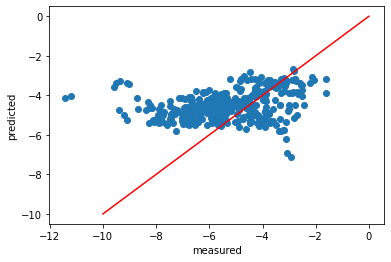

In [22]:
plt.scatter(ys, y_hats)
plt.xlabel("measured")
plt.ylabel("predicted")
plt.plot([-10,0], [-10,0], c="red")

In [23]:
np.mean((ys - y_hats)**2)

3.3456645

### Multi Channel

In [24]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
# df = pd.read_pickle("all_221_cp5_3_species_oxides.pkl")

In [25]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
       'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
       'Ni', 'O', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Th',
       'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='<U2')

In [26]:
nchannel = len(elements)
nchannel

76

In [27]:
net = VoxelNet(nchannel)
count_parameters(net)

79809

In [28]:
names, reciprocal_data, ys = prepare_multi_channel_data(df, sigma=0.1, L=12.8, N=32, elements=elements)

Number of molecules 377


In [29]:
seed_everything()
device = get_default_device()

net = VoxelNet(nchannel)
net = net.to(device)

ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=32, nchannel=nchannel,
               shuffle=False, rotate_randomly=True, device=device)

fit(25, net, ml, torch.optim.Adam, lr=0.001, weight_decay=0)

Epoch 0: loss 14.67728042602539
Epoch 1: loss 2.514376163482666
Epoch 2: loss 5.0783867835998535
Epoch 3: loss 4.226783275604248
Epoch 4: loss 2.866584300994873
Epoch 5: loss 0.4608750343322754
Epoch 6: loss 0.4443250894546509
Epoch 7: loss 0.35619649291038513
Epoch 8: loss 0.33131200075149536
Epoch 9: loss 0.30105602741241455
Epoch 10: loss 0.34072765707969666
Epoch 11: loss 0.5672445297241211
Epoch 12: loss 0.7887255549430847
Epoch 13: loss 1.1234426498413086
Epoch 14: loss 1.7197688817977905
Epoch 15: loss 2.689113140106201
Epoch 16: loss 3.1120078563690186
Epoch 17: loss 2.861414670944214
Epoch 18: loss 1.5445955991744995
Epoch 19: loss 1.3690943717956543
Epoch 20: loss 1.339393973350525
Epoch 21: loss 0.8063457012176514
Epoch 22: loss 0.6808525919914246
Epoch 23: loss 0.3835238814353943
Epoch 24: loss 0.36736631393432617
Finished in 3065.4534s.


In [30]:
ml_pred = MolLoader(names, reciprocal_data, ys,
                   L=12.8, N=32, batch_size=32, nchannel=nchannel,
                   shuffle=False, rotate_randomly=True, device=device)
ys, y_hats = predict(net, ml_pred)

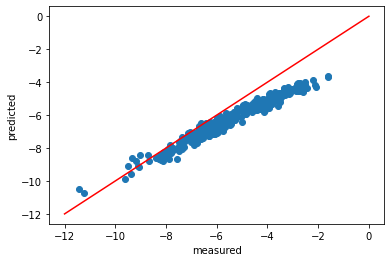

In [31]:
plt.scatter(ys, y_hats)
plt.xlabel("measured")
plt.ylabel("predicted")
plt.plot([-12,0], [-12,0], c="red")

In [32]:
np.mean((ys - y_hats)**2)

0.8684843